In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import json

In [2]:
# reading the csv
kr_df = pd.read_csv("../resources/KRvideos.csv", encoding="utf-8")
kr_df = kr_df.dropna(how="any")
kr_df[["category_id", "views", "likes", "dislikes", "comment_count"]] = kr_df[["category_id", "views", "likes", "dislikes", "comment_count"]].astype(np.int64)

In [3]:
# reading the json file
file = open("../resources/kr_category_id.json")
kr_json = json.load(file)

In [4]:
# looping through the json file and replacing the category id with the category name
length = len(kr_json["items"])
length

kr_df["category_id"] = kr_df["category_id"].astype(str)

for x in range(length):
    id_number = kr_json["items"][x]["id"]
    category_name = kr_json["items"][x]["snippet"]["title"]
    kr_df["category_id"] = kr_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
kr_df["category_id"] = kr_df["category_id"].replace({"29": "Nonprofits & Activism"})

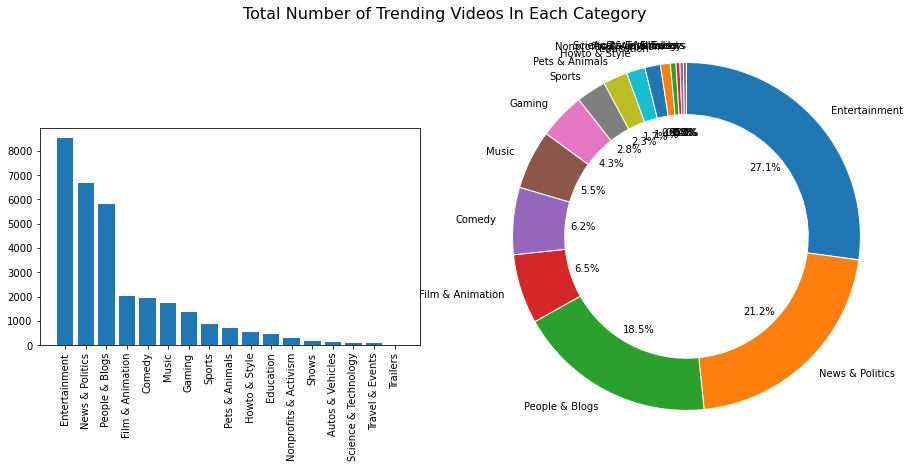

In [5]:
# this shows how many videos of each category is present in the data
kr_count_df = pd.DataFrame(kr_df.groupby("category_id").count(), columns=["video_id"])
kr_count_df = kr_count_df.rename(columns={"video_id": "count"})
kr_count_sort = kr_count_df.sort_values(by=["count"], ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.bar(kr_count_sort.index, kr_count_sort["count"])
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.pie(kr_count_sort["count"], labels=kr_count_sort.index, autopct="%.1f%%",
       startangle=90, counterclock=False, radius=2,
        wedgeprops=dict(width=0.6, edgecolor="w"))
fig.suptitle("Total Number of Trending Videos In Each Category", fontsize=16, y=1.3)
plt.show()

In [6]:
# separate dataframe using just the numerical value columns
# this is probably not too needed
kr_dateview_df = kr_df.loc[kr_df["comments_disabled"] == False, :]
kr_dateview_df = kr_dateview_df.loc[kr_dateview_df["ratings_disabled"] == False, :]
kr_dateview_df = kr_dateview_df.loc[kr_dateview_df["video_error_or_removed"] == False, :]
kr_dateview_df = pd.DataFrame(kr_dateview_df, columns=["category_id", "views", "likes", "dislikes", "comment_count"])
kr_dateview_df.groupby("category_id").sum()

,views,likes,dislikes,comment_count
category_id,,,,
Autos & Vehicles,14259907,143508,12992,39457
Comedy,691864558,12567484,514212,2949859
Education,70543573,1077506,51767,276048
Entertainment,4433730695,87261411,7801839,17069826
Film & Animation,1150052101,16236038,614540,2646611
Gaming,360512719,9475622,304360,4744187
Howto & Style,172364675,3592940,125150,375174
Music,3730424834,239479461,6289997,30439279
News & Politics,964475745,11879363,1033195,3450818


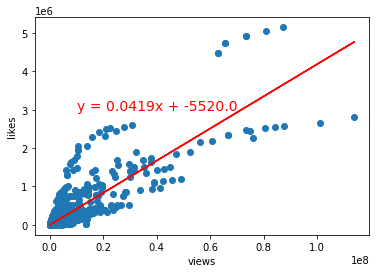

In [7]:
# views vs likes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(kr_dateview_df["views"], kr_dateview_df["likes"])
regress_value = kr_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(kr_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 3e6), fontsize=14, color="red")
plt.scatter(kr_dateview_df["views"], kr_dateview_df["likes"])
plt.xlabel("views")
plt.ylabel("likes")
plt.show()

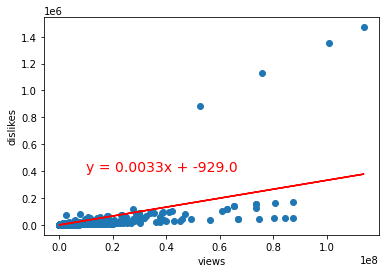

In [8]:
# views vs dislikes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(kr_dateview_df["views"], kr_dateview_df["dislikes"])
regress_value = kr_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(kr_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 4e5), fontsize=14, color="red")
plt.scatter(kr_dateview_df["views"], kr_dateview_df["dislikes"])
plt.xlabel("views")
plt.ylabel("dislikes")
plt.show()

In [9]:
kr_no_comment_df = kr_df.loc[kr_df["comments_disabled"] == True, :]
kr_no_rate_df = kr_df.loc[kr_df["ratings_disabled"] == True, :]
kr_no_video_df = kr_df.loc[kr_df["video_error_or_removed"] == True, :]

frame1 = kr_no_comment_df["category_id"].value_counts().to_frame()
frame2 = kr_no_rate_df["category_id"].value_counts().to_frame()
frame3 = kr_no_video_df["category_id"].value_counts().to_frame()

merge = frame1.merge(frame2, how="outer", left_index=True, right_index=True)
merge = merge.merge(frame3, how="outer", left_index=True, right_index=True)
merge = merge.rename(columns={"category_id_x": "Comments Disabled",
                             "category_id_y": "Rating Disabled",
                             "category_id": "Video Error/Deleted"})
merge = merge.fillna(0)
merge = merge.astype(np.int64)
merge

,Comments Disabled,Rating Disabled,Video Error/Deleted
Comedy,37,98,0
Education,11,14,0
Entertainment,66,262,2
Film & Animation,12,23,6
Gaming,38,24,0
Howto & Style,20,12,0
Music,5,39,23
News & Politics,156,480,9
Nonprofits & Activism,2,8,0
People & Blogs,85,276,0


In [10]:
# shows which channel
kr_df["channel_title"].value_counts()

도봉박홍기                 218
신의한수                  198
보겸 TV                 195
JTBC News             182
윤창중칼럼세상 TV            178
                     ... 
CHANNEL 1986            1
낌미 #                    1
Tamtam Lyrics 1         1
Karen Hoseok Hwang      1
비니BINI                  1
Name: channel_title, Length: 3582, dtype: int64